In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\logic\Documents\datascience\IT Salary Survey EU 2018.csv')

In [3]:
df

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,03/06/2020 20:12:51,40.0,M,Köln,Java Developer junior,1.0,Junior,44000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
761,28/07/2020 04:03:13,NaN,M,Köln,E.g. C# Developer,1.0,Junior,45000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
762,28/07/2020 04:03:20,NaN,M,Köln,E.g. C# Developer,1.0,Junior,45000.0,40000.0,40000.0,Yes,Deutsch,10-50,Product
763,26/08/2020 09:06:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking Null values of samples
df.isnull().sum()

Timestamp                               0
Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

In [5]:
# drop null values
df.dropna(inplace=True)
df = df.reset_index(drop = True)

In [6]:

df.isnull().sum()


Timestamp                             0
Age                                   0
Gender                                0
City                                  0
Position                              0
Years of experience                   0
Your level                            0
Current Salary                        0
Salary one year ago                   0
Salary two years ago                  0
Are you getting any Stock Options?    0
Main language at work                 0
Company size                          0
Company type                          0
dtype: int64

In [7]:
df=df.iloc[:,2:]

In [8]:
df.sample(5)

,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
360,M,Berlin,Producer,7.0,Senior,69000.0,67000.0,64500.0,No,English,1000+,Product
184,M,München,Lead Architect,15.0,Senior,110000.0,110000.0,95000.0,No,Deutsch,1000+,Agency
73,M,Berlin,DBA,17.0,Senior,87000.0,80000.0,65000.0,Yes,English,1000+,Product
55,M,Berlin,Software Architect,12.0,Senior,78600.0,75000.0,69000.0,No,English,100-1000,Product
156,M,Konstanz,Data Scientist,10.0,Middle,65000.0,60000.0,60000.0,No,English,50-100,Product


# Train test split

In [9]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, [3,5]]
y=df['Current Salary'].values
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    df['Current Salary'],
                                                    test_size=0.3,
                                                    random_state=2)

X_train.shape, X_test.shape

((257, 2), (111, 2))

 ## Standardize features by removing the mean and scaling to unit variance.

 ##  The standard score of a sample x is calculated as:

 ##                        z = (x - u) / s

 ##  where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
 ##  Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

  ##  Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

# Standard Scaler


In [10]:
# In standardization new mean =0  and S.D=1   , Mean Centering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.mean_



array([9.29571984e+00, 7.28741245e+04])

In [11]:
X_train

,Years of experience,Current Salary
53,15.0,120000.0
259,12.0,87000.0
308,5.0,90000.0
170,8.0,66000.0
199,6.0,59000.0
...,...,...
299,8.0,132000.0
22,12.0,84000.0
72,20.0,84000.0
15,10.0,132250.0


In [12]:
X_train_scaled

array([[ 1.29118226,  2.21185522],
       [ 0.61212256,  0.66299864],
       [-0.97235008,  0.80380378],
       [-0.29329038, -0.32263736],
       [-0.74599684, -0.6511827 ],
       [-0.74599684, -0.97972803],
       [-0.74599684, -0.60424765],
       [-1.19870331, -0.36957241],
       [ 0.15941609,  0.70993369],
       [ 0.61212256,  0.56912854],
       [-0.74599684,  2.44653045],
       [ 0.61212256, -0.27570231],
       [ 2.64930166,  0.80380378],
       [-1.42505654, -1.05482411],
       [ 0.15941609, -1.21440327],
       [-0.74599684, -0.46344251],
       [-1.19870331, -0.27570231],
       [-1.19870331, -0.83892289],
       [-0.51964361,  0.33445331],
       [-1.42505654, -1.07359813],
       [ 0.15941609, -0.60424765],
       [-0.06693714, -0.60424765],
       [-0.06693714,  0.56912854],
       [-0.97235008, -0.48691003],
       [-1.87776301, -0.36957241],
       [-0.51964361, -0.48691003],
       [ 1.97024196,  0.90236738],
       [-1.42505654, -2.01229908],
       [ 0.15941609,

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(), 1)

,Years of experience,Current Salary
count,257.0,257.0
mean,9.3,72874.1
std,4.4,21347.6
min,0.0,15000.0
25%,6.0,60000.0
50%,9.0,70000.0
75%,12.0,83000.0
max,25.0,176000.0


In [15]:
np.round(X_train_scaled.describe(), 1)

,Years of experience,Current Salary
count,257.0,257.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.1,-2.7
25%,-0.7,-0.6
50%,-0.1,-0.1
75%,0.6,0.5
max,3.6,4.8


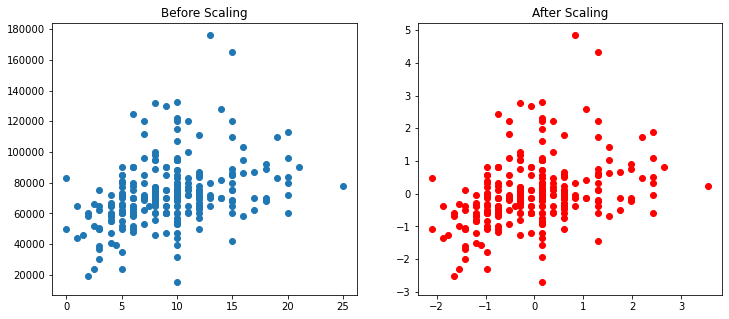

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Years of experience'], X_train['Current Salary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Years of experience'], X_train_scaled['Current Salary'],color='red')
ax2.set_title("After Scaling")
plt.show()

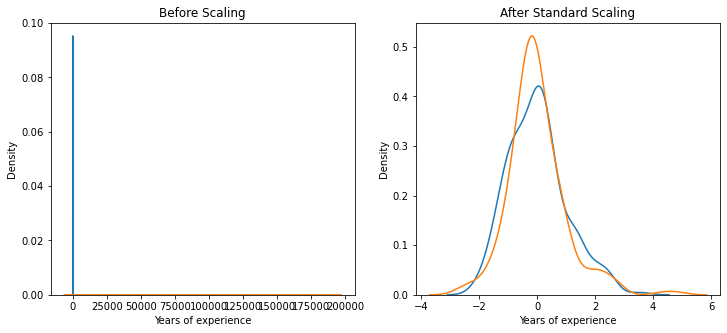

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Years of experience'], ax=ax1)
sns.kdeplot(X_train['Current Salary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Years of experience'], ax=ax2)
sns.kdeplot(X_train_scaled['Current Salary'], ax=ax2)
plt.show()

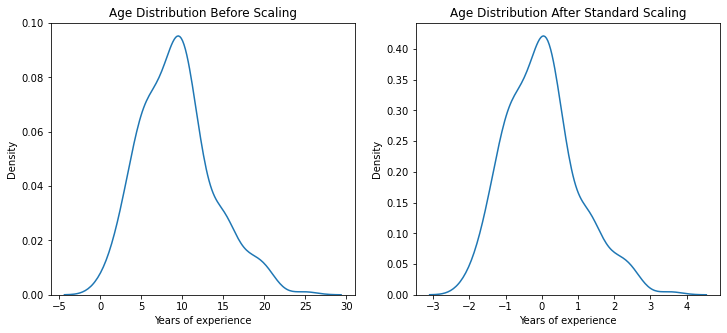

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Years of experience'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Years of experience'], ax=ax2)
plt.show()

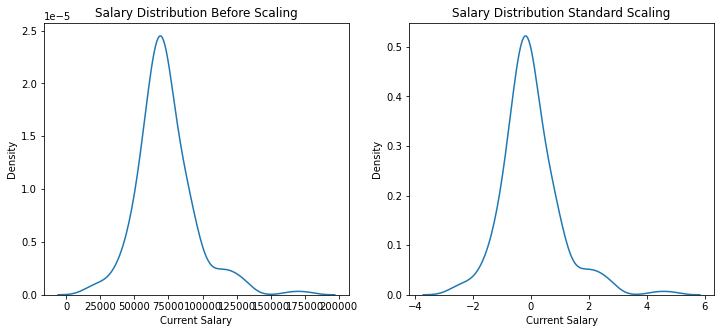

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['Current Salary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['Current Salary'], ax=ax2)
plt.show()

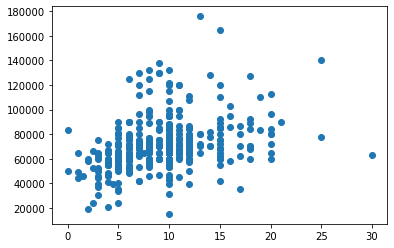

In [20]:
plt.scatter(df['Years of experience'], df['Current Salary'])

# Why scaling is important?

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. 
But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.